In [1]:
import options as opt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sim_args = {'spot': 100.0, 'expiry': 1.0, 'rate': 0.15, 'div': 0.0, 'vol': 0.3, 'num': 252}

In [3]:
path = opt.binomial_path(**sim_args)

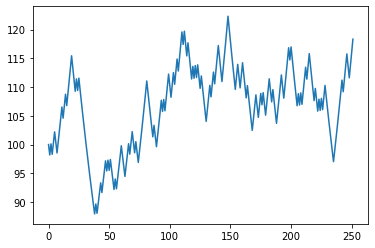

In [4]:
plt.plot(path)

In [26]:
NUMDAYS = 365
steps = sim_args['num'] - 1
hedge_args = {'spot': 100.0, 'strike': 95.0, 'expiry': 1.0, 'rate': 0.0, 'div': 0.0, 'vol': 0.3, 'num': 365, 'payoff': opt.call_payoff}
delta = np.empty(steps)
for i in range(steps):
    hedge_args['spot'] = path[i]
    hedge_args['expiry'] = (NUMDAYS - i) / NUMDAYS 
    hedge_args['num'] = NUMDAYS - i
    delta[i] = opt.binomial_delta(**hedge_args) * path[i]
    

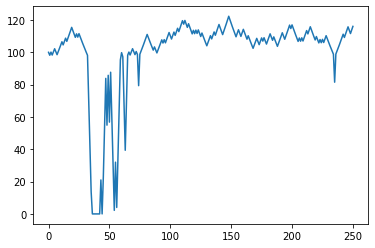

In [27]:
plt.plot(delta)

In [29]:
rate = 0.0
div = 0.0
h = 1.0 / 252
vol = 0.3
u = np.exp((rate - div) * h + np.sqrt(h) * vol)
d = np.exp((rate - div) * h - np.sqrt(h) * vol)